In [2]:
import pandas as pd

df=pd.read_csv("E:\\STIP TASKS\\train.csv")
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [3]:
g=df.groupby(by="is_promoted")
print(g.get_group(0).shape)
print(g.get_group(1).shape)
#the dataset imbalanced 
#so make the dataset balanced by downsampling or upsampling

(50140, 14)
(4668, 14)


In [4]:
x=df.drop(["employee_id","gender"],axis=1)

In [5]:
y=x.isnull()
y.sum()

department                 0
region                     0
education               2409
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [6]:
import numpy as np
rep_nan=x.replace(" ",np.NaN)
rename=rep_nan.rename(columns={"region":"region_no"})

In [7]:
data1=rename.fillna(method="ffill")
data1

,department,region_no,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,Bachelor's,sourcing,1,29,1.0,2,0,0,45,0


In [8]:
data1.isnull().sum()

department              0
region_no               0
education               0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1["department"]=le.fit_transform(data1["department"])
data1["region_no"]=le.fit_transform(data1["region_no"])

data1["education"]=le.fit_transform(data1["education"])
data1["recruitment_channel"]=le.fit_transform(data1["recruitment_channel"])

data1

,department,region_no,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,2,1,35,5.0,8,1,0,49,0
1,4,14,0,0,1,30,5.0,4,0,0,60,0
2,7,10,0,2,1,34,3.0,7,0,0,50,0
3,7,15,0,0,2,39,1.0,10,0,0,50,0
4,8,18,0,0,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,8,5,0,2,1,48,3.0,17,0,0,78,0
54804,4,19,2,0,1,37,2.0,6,0,0,56,0
54805,0,0,0,0,1,27,5.0,3,1,0,79,0
54806,7,33,0,2,1,29,1.0,2,0,0,45,0


[]

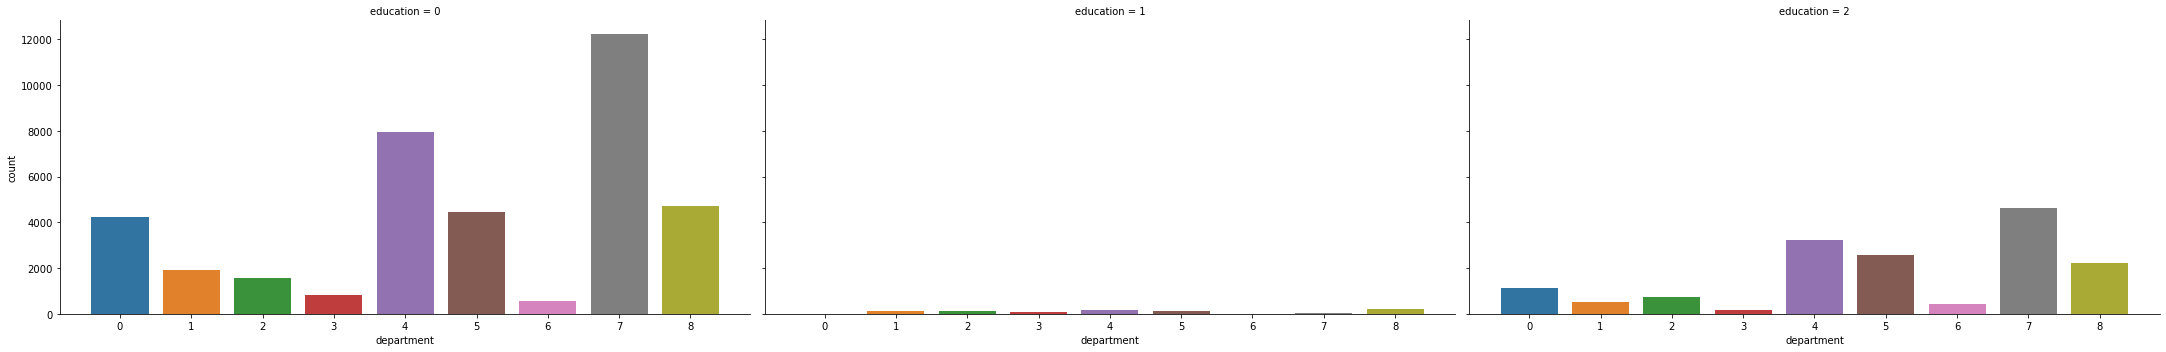

In [10]:
#in which department bachelors are high
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(x="department",col="education",data=data1,kind="count",aspect=2)
plt.plot()

[]

<Figure size 3600x36000 with 0 Axes>

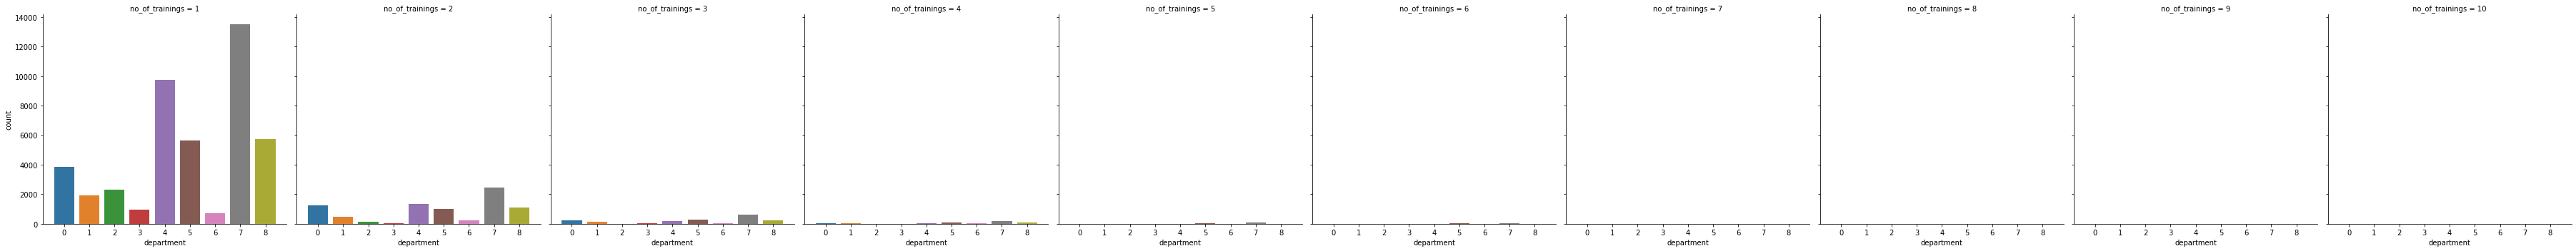

In [11]:
#for which department got only one time training
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50,500))
sns.catplot(x="department",col="no_of_trainings",data=data1,kind="count")
plt.plot()

[]

<Figure size 3600x36000 with 0 Axes>

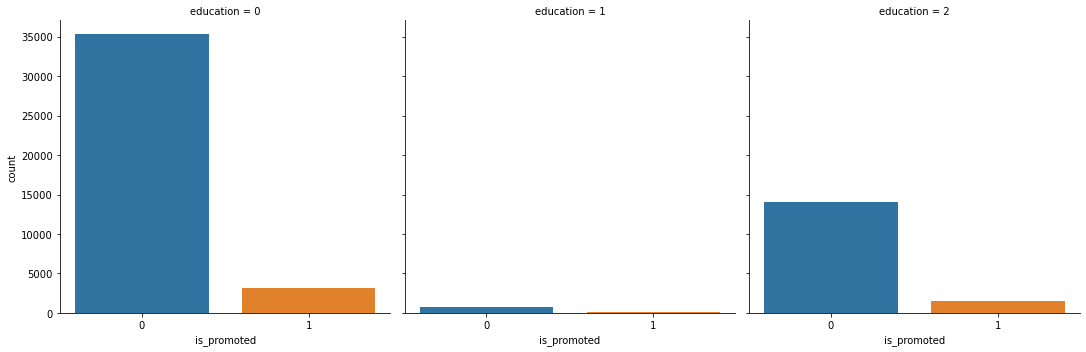

In [12]:
#which education_qualification got promoted
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50,500))
sns.catplot(x="is_promoted",col="education",data=data1,kind="count")
plt.plot()

[]

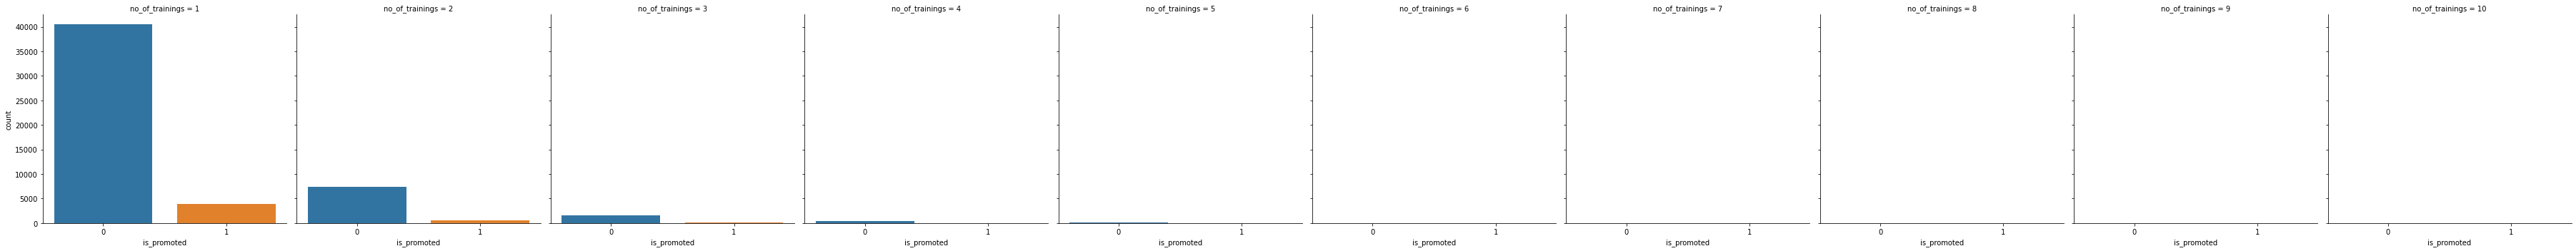

In [13]:
#one time trained people got promoted highly?
import matplotlib.pyplot as plt
import seaborn as sns
#plt.figure(figsize=(50,50))
sns.catplot(x="is_promoted",col="no_of_trainings",data=data1,kind="count",aspect=1)
plt.plot()

In [14]:
#statement: 

#1)Bachelors are high in sales 

#2)sales department got one training highly

#3)one time trained people are not promoted highly

#4)Bachelors are not promoted highly

#which education persons perform worstly??

#BACHELORS


In [15]:
data=data1.iloc[:,0:11]
target=data1.iloc[:,11]
target

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

for i in data.columns:
    data[i]=scale.fit_transform(data[[i]])

In [17]:
"""
#downsampling
from imblearn.under_sampling import NearMiss
under_s=NearMiss()
data1,target1=us.fit_resample(data,target)
"""
#upsampling
from imblearn.over_sampling import RandomOverSampler
up_s=RandomOverSampler()
data1,target1=up_s.fit_resample(data,target)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data1,target1,train_size=0.7)

In [19]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

In [20]:
alg_names=[]
svc=(("SVC",SVC()))
knn=(("KNN",KNeighborsClassifier()))
lr=(("LogisticRegression",LogisticRegression()))
naive=(("Naive_Bayes",GaussianNB()))
random=(("RandomForestClassifier",RandomForestClassifier()))
decision=(("DecisionTreeClassifiers",DecisionTreeClassifier()))
alg_names.append(knn)
alg_names.append(lr)
alg_names.append(naive)
alg_names.append(random)
alg_names.append(decision)
alg_names.append(svc)

alg_names

[('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('LogisticRegression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('Naive_Bayes', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('RandomForestClassifier',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, m

In [21]:
"""
for name,model in alg_names:
    kf=KFold(n_splits=10)
    res_cross=cross_val_score(model,x_train,y_train,cv=kf,scoring="accuracy")
    print(name,(res_cross.mean())*100)
"""
    

'\nfor name,model in alg_names:\n    kf=KFold(n_splits=10)\n    res_cross=cross_val_score(model,x_train,y_train,cv=kf,scoring="accuracy")\n    print(name,(res_cross.mean())*100)\n'

In [22]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=15)
model.fit(x_train,y_train)
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score
print("training_accuracy:",(accuracy_score(train_pred,y_train))*100)
print("testing_accuracy:",(accuracy_score(test_pred,y_test))*100)

training_accuracy: 99.96011168727563
testing_accuracy: 97.63329344502061


In [24]:
from sklearn.metrics import *
print("confusion_matrix:\n",confusion_matrix(train_pred,y_train))
print("classification_report:\n",classification_report(train_pred,y_train))

confusion_matrix:
 [[34915     0]
 [   28 35253]]
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     34915
           1       1.00      1.00      1.00     35281

    accuracy                           1.00     70196
   macro avg       1.00      1.00      1.00     70196
weighted avg       1.00      1.00      1.00     70196



In [42]:
TN=34915 
TP=35253
FP=28
FN=0
print("True_Positive:",TP)
print("True_Negative:",TN)
print("False_Positive:",FP)
print("False_Negative:",FN)
TPR=TP/(TP+FN)
TNR=TN/(TN+FP)
precision=TPR
print("Precision or specifity or True_Positive_Rate:",precision)
recall=TNR
print("Recall or sensitivity or True_Negative_Rate:",recall)
F_score=((2*precision*recall)/(precision+recall))
print("accuracy or F_score:",F_score)
print("error_rate:",(1-F_score))

True_Positive: 35253
True_Negative: 34915
False_Positive: 28
False_Negative: 0
Precision or specifity or True_Positive_Rate: 1.0
Recall or sensitivity or True_Negative_Rate: 0.9991986950176001
accuracy or F_score: 0.9995991869220417
error_rate: 0.00040081307795825083


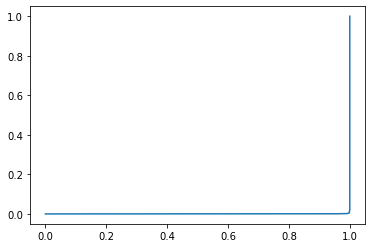

In [34]:
plt.plot(tpr,fpr)

In [ ]:
#accuracy, error_rate plotting
import matplotlib.pyplot as plt
c=[i for i in range(len(y_train))]
plt.scatter(c,y_train,label="actual-values",color="green")
plt.scatter(c,train_pred,label="predicted-values",color='blue')
plt.legend(loc="center")

In [ ]:
import pandas as pd

test_df=pd.read_csv("E:\\STIP TASKS\\test.csv")

import copy
x=test_df.drop(["employee_id","gender"],axis=1)
import numpy as np
rep_nan=x.replace(" ",np.NaN)
rename=rep_nan.rename(columns={"region":"region_no"})

data1=rename.fillna(method="bfill")
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1["department"]=le.fit_transform(data1["department"])
data1["region_no"]=le.fit_transform(data1["region_no"])

data1["education"]=le.fit_transform(data1["education"])
data1["recruitment_channel"]=le.fit_transform(data1["recruitment_channel"])
data=copy.deepcopy(data1)
scale=StandardScaler()

for i in data1.columns:
    data1[i]=scale.fit_transform(data1[[i]])
data1

In [ ]:
y_pred=model.predict(data1)

In [ ]:
data["pred_is_promoted"]=y_pred

In [ ]:
data